/var/folders/mb/x16lw2h51r5f4p3x42njrzbm0000gn/T/ipykernel_13605/3722677787.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

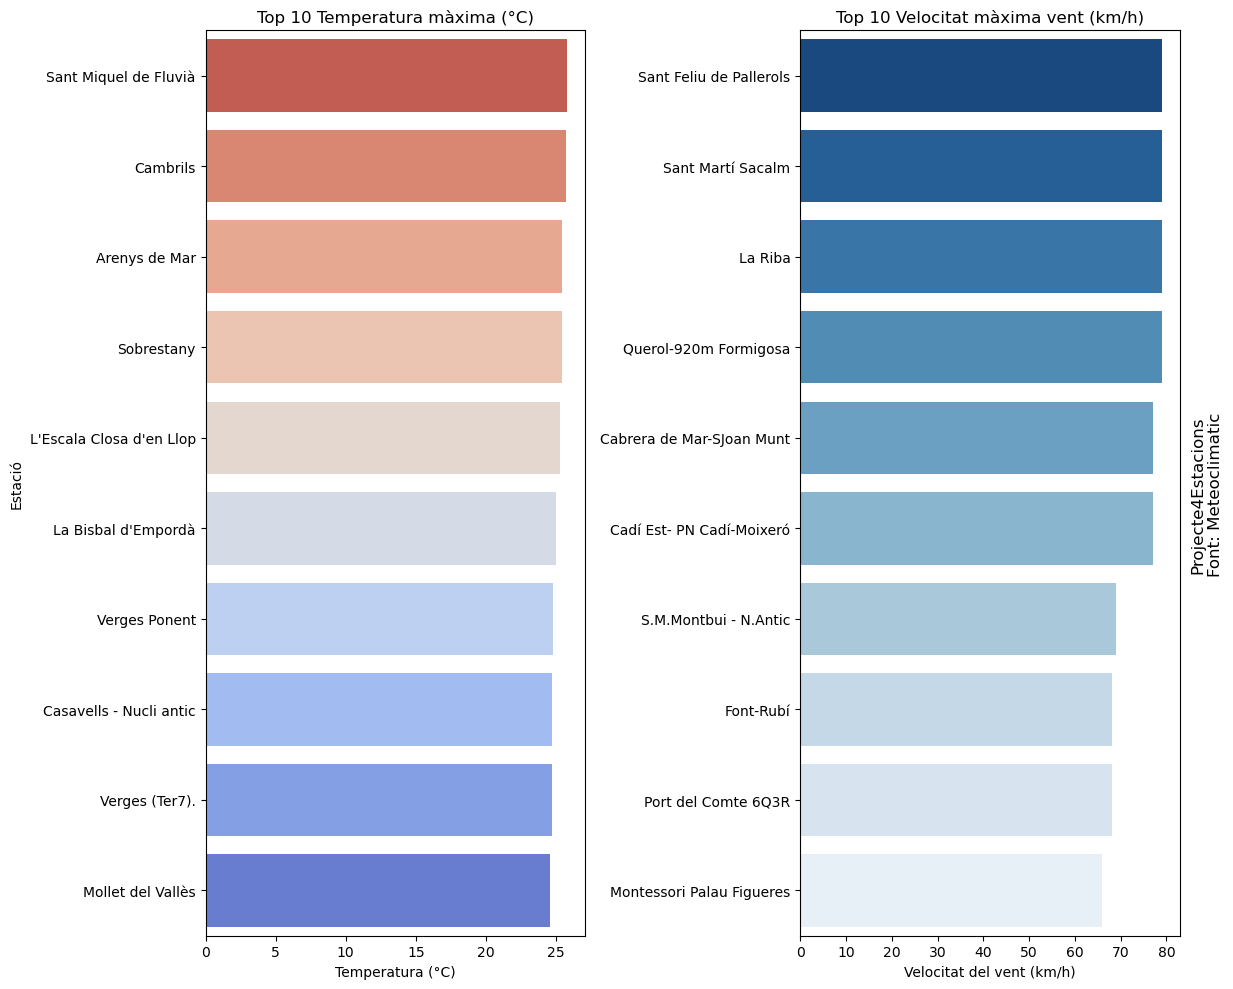

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/arnautoledanorubi/Desktop/Python/web_scrapping/meteoclimatic_27102023.csv'
weather_data = pd.read_csv(file_path)

# Convert 'Temp_max', 'Temp_min', and 'Wind_max' to numeric values
weather_data['Temp_max'] = pd.to_numeric(weather_data['Temp_max'], errors='coerce')
weather_data['Temp_min'] = pd.to_numeric(weather_data['Temp_min'], errors='coerce')
weather_data['Wind_max'] = pd.to_numeric(weather_data['Wind_max'], errors='coerce')

# Drop the 'Unnamed: 0' column as it is just an index
weather_data = weather_data.drop(columns=['Unnamed: 0'])

# Handle missing values: Drop rows with missing values in 'Temp_max' or 'Wind_max'
weather_data_cleaned = weather_data.dropna(subset=['Temp_max', 'Wind_max'])

# Exclude the wind speed value from Barcelona - Rectoret station
weather_data_excluded = weather_data_cleaned[weather_data_cleaned['Station Name'] != 'Barcelona - Rectoret']

# Initialize the figure
plt.figure(figsize=(12, 10))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

# Top 10 stations by maximum temperature
top_temp_max = weather_data_cleaned.nlargest(10, 'Temp_max')
sns.barplot(x='Temp_max', y='Station Name', data=top_temp_max, ax=axes[0], palette='coolwarm_r')
axes[0].set_title('Top 10 Temperatura màxima (°C)')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('Estació')

# Top 10 stations by maximum wind speed (excluding Barcelona - Rectoret)
top_wind_max = weather_data_excluded.nlargest(10, 'Wind_max')
sns.barplot(x='Wind_max', y='Station Name', data=top_wind_max, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 10 Velocitat màxima vent (km/h)')
axes[1].set_xlabel('Velocitat del vent (km/h)')
axes[1].set_ylabel('')

plt.figtext(1.01, 0.5, 'Projecte4Estacions\nFont: Meteoclimatic', rotation='vertical', ha='center', va='center', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.tight_layout()
#plt.savefig('/Users/arnautoledanorubi/Desktop/Python/web_scrapping/tt.png', dpi=300)
plt.show()